<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/fall2020/blob/master/lab_regularization.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Lab -- Regularization

* Reference: [ch04.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch04/ch04.ipynb)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the wine data (Raschka's cell 33)
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Split the data into training and test sets (cell 36)
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [4]:
# Feature scaling (cell 37)
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Figures from Raschka's [ch04.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch04/ch04.ipynb)

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch04/images/04_04.png" width="400"/>

## L2

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch04/images/04_05.png" width="400"/>

## L1 

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch04/images/04_06.png" width="400"/>


In [5]:
# Logistic regression with L1 (cell 42)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [6]:
np.set_printoptions(8)
lr.coef_

array([[ 1.24593426,  0.18061091,  0.74596013, -1.16367695,  0.        ,
         0.        ,  1.15964906,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55678769,  2.50922987],
       [-1.5374199 , -0.38735528, -0.99543608,  0.36492543, -0.05947751,
         0.        ,  0.66812007,  0.        ,  0.        , -1.933868  ,
         1.23353666,  0.        , -2.2315513 ],
       [ 0.13577458,  0.16828426,  0.35710938,  0.        ,  0.        ,
         0.        , -2.43853501,  0.        ,  0.        ,  1.56384459,
        -0.81906402, -0.49185233,  0.        ]])

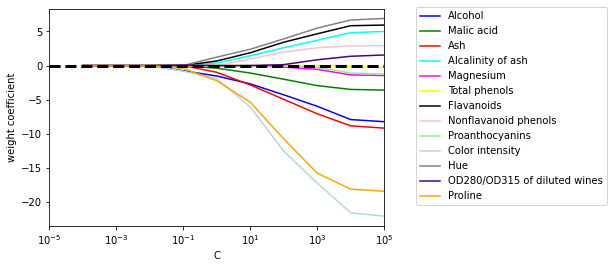

In [7]:
# Cell 47
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()